## **Cosine Similarity**

기간의 간격이 정해져 있으며 비교적 짧은 기간의 패턴 분석에 유용함! <br> 시계열 자료 이외의 분석에도 유용 <br>

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c7ed238cab43175cb932/b9b720f87c87cae4c5d96903e6f002a6/image.png">

![All text](https://trello-attachments.s3.amazonaws.com/5958a9306d9a58d78d4bdd84/59f2a13dc12eeef59ebd485f/92bb3b752662cd9fe84be3ebd980ac50/image.png)

### 여기서는 종가의 percent change 가 아닌 min, max scaling을 통해 Normalizing 된 데이터를 사용하려고 합니다

In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [2]:
cos_angle = 1 - spatial.distance.cosine([1,1],[2,2])
cos_angle

1.0

In [3]:
a = pd.Series([1,1], index=['A','B'])
b = pd.Series([2,2], index=['A','B'])
cos_angle = 1 - spatial.distance.cosine(a,b)
cos_angle # pd.Series 넣어도 잘 나오네요

1.0

데이터를 통한 실험

In [4]:
close = pd.read_csv('C:\\Data\\Abnormal Price Separated Table.csv',index_col = ['Date'])
close.index = pd.to_datetime(close.index, format = '%Y-%m-%d')
close

,A000010,A000020,A000030,A000040,A000050,A000070,A000100,A000110,A000150,A000180,...,A900270_1,A900270_2,A900280_1,A900280_2,A950010_1,A950010_2,A950030_1,A950030_2,A950070_1,A950070_2
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,4050.0,3116,4150.0,5550,1694,13177,19187,2645.0,26372,754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305,3950.0,6350,1651,13177,18831,2645.0,26668,727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871,3500.0,6800,1723,13069,17597,2645.0,25088,682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296,3600.0,6100,1644,13717,18420,2645.0,25631,730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,3980.0,3211,3800.0,6600,1622,14689,18557,2645.0,25433,713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,3740.0,3277,3700.0,6550,1593,14041,18694,2645.0,25088,700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,3500.0,3768,3600.0,6000,1572,14365,18255,2645.0,25680,712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,3250.0,3513,3430.0,5800,1637,14365,17926,2645.0,23804,690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-14,3300.0,2993,3395.0,5650,1716,13825,17926,2645.0,24989,745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


데이터 날짜로(column) slicing 하기

In [6]:
test_data = close['2017-04':'2017-06'].T # 2017년 1분기 차트로 확인하기, 계산의 편의를 위해 Transpose
test_data

Date,2017-04-03 00:00:00,2017-04-04 00:00:00,2017-04-05 00:00:00,2017-04-06 00:00:00,2017-04-07 00:00:00,2017-04-10 00:00:00,2017-04-11 00:00:00,2017-04-12 00:00:00,2017-04-13 00:00:00,2017-04-14 00:00:00,...,2017-06-19 00:00:00,2017-06-20 00:00:00,2017-06-21 00:00:00,2017-06-22 00:00:00,2017-06-23 00:00:00,2017-06-26 00:00:00,2017-06-27 00:00:00,2017-06-28 00:00:00,2017-06-29 00:00:00,2017-06-30 00:00:00
A000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,9370.0,9280.0,9350.0,9230.0,9400.0,9220.0,9450.0,9380.0,9420.0,9230.0,...,8680.0,8450.0,8600.0,8580.0,8630.0,8590.0,8490.0,8350.0,8410.0,8470.0
A000030,13150.0,13050.0,13450.0,13650.0,13900.0,13650.0,13650.0,13750.0,13800.0,13950.0,...,17250.0,16850.0,16800.0,17000.0,17350.0,17500.0,17500.0,18050.0,18600.0,18450.0
A000040,797.0,785.0,788.0,778.0,778.0,770.0,760.0,759.0,759.0,749.0,...,897.0,887.0,881.0,865.0,955.0,930.0,881.0,867.0,906.0,907.0
A000050,14750.0,14950.0,14800.0,14850.0,14750.0,14500.0,14500.0,14400.0,14350.0,14250.0,...,15900.0,16150.0,15950.0,15800.0,15800.0,15600.0,15550.0,15750.0,15600.0,15600.0
A000070,126000.0,125000.0,126000.0,126000.0,123500.0,121500.0,120500.0,120500.0,125000.0,124500.0,...,130500.0,124500.0,124500.0,122500.0,124000.0,123000.0,121500.0,123500.0,119500.0,122500.0
A000100,233000.0,232500.0,232000.0,230000.0,228500.0,228500.0,230000.0,229500.0,231500.0,228000.0,...,241000.0,235000.0,239500.0,240500.0,241000.0,240000.0,242000.0,241000.0,241000.0,246000.0
A000110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000150,94400.0,94100.0,95300.0,96800.0,98100.0,96200.0,95500.0,95500.0,95900.0,94600.0,...,117000.0,116500.0,113000.0,113500.0,113000.0,114000.0,114500.0,115500.0,116500.0,119000.0
A000180,3075.0,3075.0,3085.0,3060.0,3050.0,3000.0,2980.0,2965.0,2970.0,2970.0,...,3195.0,3185.0,3135.0,3155.0,3155.0,3150.0,3155.0,3125.0,3105.0,3105.0


Min-Max Scaling 함수 만들기

In [7]:
def get_minmax_scale(series):
    return (series-series.min())/(series.max()-series.min())

In [8]:
test_data = test_data.apply(get_minmax_scale, axis=1) # 종가 테이블의 최대,최소를 1,0 으로 통일(Normalizing)
test_data = test_data.dropna() # blank 제거
test_data

Date,2017-04-03 00:00:00,2017-04-04 00:00:00,2017-04-05 00:00:00,2017-04-06 00:00:00,2017-04-07 00:00:00,2017-04-10 00:00:00,2017-04-11 00:00:00,2017-04-12 00:00:00,2017-04-13 00:00:00,2017-04-14 00:00:00,...,2017-06-19 00:00:00,2017-06-20 00:00:00,2017-06-21 00:00:00,2017-06-22 00:00:00,2017-06-23 00:00:00,2017-06-26 00:00:00,2017-06-27 00:00:00,2017-06-28 00:00:00,2017-06-29 00:00:00,2017-06-30 00:00:00
A000020,0.910714,0.830357,0.892857,0.785714,0.937500,0.776786,0.982143,0.919643,0.955357,0.785714,...,0.294643,0.089286,0.223214,0.205357,0.250000,0.214286,0.125000,0.000000,0.053571,0.107143
A000030,0.018018,0.000000,0.072072,0.108108,0.153153,0.108108,0.108108,0.126126,0.135135,0.162162,...,0.756757,0.684685,0.675676,0.711712,0.774775,0.801802,0.801802,0.900901,1.000000,0.972973
A000040,0.355102,0.306122,0.318367,0.277551,0.277551,0.244898,0.204082,0.200000,0.200000,0.159184,...,0.763265,0.722449,0.697959,0.632653,1.000000,0.897959,0.697959,0.640816,0.800000,0.804082
A000050,0.238095,0.333333,0.261905,0.285714,0.238095,0.119048,0.119048,0.071429,0.047619,0.000000,...,0.785714,0.904762,0.809524,0.738095,0.738095,0.642857,0.619048,0.714286,0.642857,0.642857
A000070,0.342105,0.289474,0.342105,0.342105,0.210526,0.105263,0.052632,0.052632,0.289474,0.263158,...,0.578947,0.263158,0.263158,0.157895,0.236842,0.184211,0.105263,0.210526,0.000000,0.157895
A000100,0.196078,0.176471,0.156863,0.078431,0.019608,0.019608,0.078431,0.058824,0.137255,0.000000,...,0.509804,0.274510,0.450980,0.490196,0.509804,0.470588,0.549020,0.509804,0.509804,0.705882
A000150,0.009404,0.000000,0.037618,0.084639,0.125392,0.065831,0.043887,0.043887,0.056426,0.015674,...,0.717868,0.702194,0.592476,0.608150,0.592476,0.623824,0.639498,0.670846,0.702194,0.780564
A000180,0.509434,0.509434,0.547170,0.452830,0.415094,0.226415,0.150943,0.094340,0.113208,0.113208,...,0.962264,0.924528,0.735849,0.811321,0.811321,0.792453,0.811321,0.698113,0.622642,0.622642
A000210,0.155556,0.096296,0.214815,0.133333,0.088889,0.059259,0.081481,0.103704,0.103704,0.044444,...,0.666667,0.429630,0.511111,0.377778,0.570370,0.525926,0.407407,0.466667,0.651852,0.740741
A000220,0.055690,0.055690,0.060533,0.050847,0.070218,0.029056,0.012107,0.002421,0.007264,0.000000,...,0.806295,0.769976,0.757869,0.818402,0.927361,0.878935,0.878935,0.769976,0.721550,0.721550


In [9]:
# 기준이되는 코드 입력, 여기서는 임의로 YG 엔터로 설정
company_code = 'A122870'
test_data.loc[company_code]

Date
2017-04-03    0.203593
2017-04-04    0.179641
2017-04-05    0.179641
2017-04-06    0.155689
2017-04-07    0.143713
2017-04-10    0.011976
2017-04-11    0.000000
2017-04-12    0.017964
2017-04-13    0.029940
2017-04-14    0.005988
2017-04-17    0.107784
2017-04-18    0.251497
2017-04-19    0.251497
2017-04-20    0.347305
2017-04-21    0.383234
2017-04-24    0.401198
2017-04-25    0.347305
2017-04-26    0.353293
2017-04-27    0.329341
2017-04-28    0.287425
2017-05-02    0.395210
2017-05-04    0.473054
2017-05-08    0.622754
2017-05-10    0.580838
2017-05-11    0.742515
2017-05-12    0.682635
2017-05-15    0.784431
2017-05-16    0.808383
2017-05-17    0.940120
2017-05-18    1.000000
2017-05-19    0.964072
2017-05-22    0.862275
2017-05-23    0.856287
2017-05-24    0.868263
2017-05-25    0.754491
2017-05-26    0.808383
2017-05-29    0.772455
2017-05-30    0.796407
2017-05-31    0.814371
2017-06-01    0.622754
2017-06-02    0.664671
2017-06-05    0.676647
2017-06-07    0.574850
2017-0

In [10]:
def get_cos_similar(company_code, test_data) :    
    target_data = test_data.loc[company_code] # target 이 되는 데이터
    compare_data = test_data.drop(company_code) # 비교 할 데이터 프레임에서 기준이되는 열 삭제
    cos_similar = pd.Series()
    for i in compare_data.index :
           cos_similar = cos_similar.append(pd.Series(1 - spatial.distance.cosine(target_data, compare_data.loc[i]), index = [i]))
    cos_similar = cos_similar.sort_values(ascending=False)
    return cos_similar

In [11]:
cos_similar = get_cos_similar(company_code, test_data)

In [12]:
def plt_cosine_result(cos_similar):
    plt.figure(figsize=(12,7))
    plt.plot(test_data.loc[company_code], label = 'Target Chart')
    plt.plot(test_data.loc[cos_similar.index[-1]], label = 'Most Similar Chart')
    plt.plot(test_data.loc[cos_similar.index[-2]], label = 'Second Similar Chart')
    plt.plot(test_data.loc[cos_similar.index[-3]], label = 'Third Similar Chart')
    plt.plot(test_data.loc[cos_similar.index[-4]], label = 'Fourth Similar Chart')
    plt.legend()
    plt.show()
    print('Most Similar Code is : ', cos_similar.index[-1])
    print('Second Similar Code is : ', cos_similar.index[-2])
    print('Third Similar Code is : ', cos_similar.index[-3])
    print('Fourth Similar Code is : ', cos_similar.index[-4])

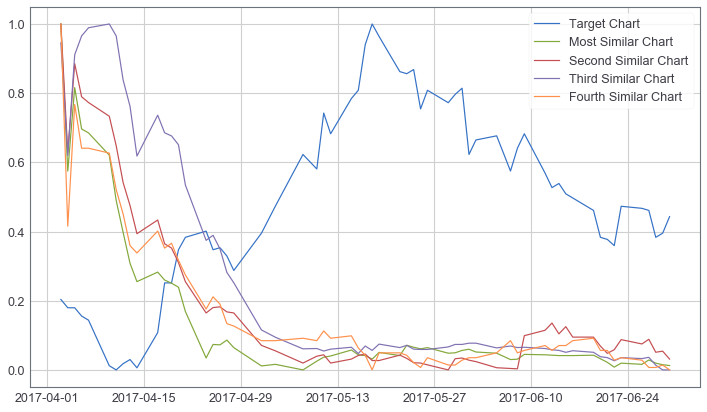

Most Similar Code is :  A001420_2
Second Similar Code is :  A093640
Third Similar Code is :  A004770
Fourth Similar Code is :  A025560


In [13]:
plt_cosine_result(cos_similar)

A041510 : 에스엠 엔터 <br>
A090430 : 아모레 퍼시픽 <br>
A024720 : 한국콜마홀딩스 <br>
A228810 : TIGER 미디어컨텐츠 ETF

한참 한,중 간의 사드 이슈가 있었던 시기로 그에 따라 같이 영향을 받은 엔터, 화장품 주가 묶여서 나온것 같습니다.

## **DTW(Dynamic Time Warping) Algorithm**

기간의 간격이 유동적일 경우 유용함 <br> 과거 사례 검색에 도움 <br> 초단기 패턴 분석에 유용

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c7ed238cab43175cb932/fa5feffb470b0fec564cdad8b691dbf4/image.png">

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c7ed238cab43175cb932/06121d009fb6163028ae1f74307cc71b/image.png">

In [14]:
from math import *
import numpy as np
import sys
maxint = 999999

def DTW(A, B, window=maxint, d=lambda x, y: abs(x - y)):
    # 비용 행렬 초기화 
    A, B = np.array(A), np.array(B)
    M, N = len(A), len(B)
    cost = maxint * np.ones((M, N)) # Maxint 로 inititailizing

    # 첫번째 로우,컬럼 채우기
    cost[0, 0] = d(A[0], B[0])
    for i in range(1, M):
        cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j - 1] + d(A[0], B[j])
    # 나머지 행렬 채우기 
    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window)):
            choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
            cost[i, j] = min(choices) + d(A[i], B[j])

        # 최적 경로 구하기 
        n, m = N - 1, M - 1
        path = []

        while (m, n) != (0, 0):
            path.append((m, n))
            m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

    path.append((0, 0))
    return cost[-1, -1], path

Total Distance is  2.0


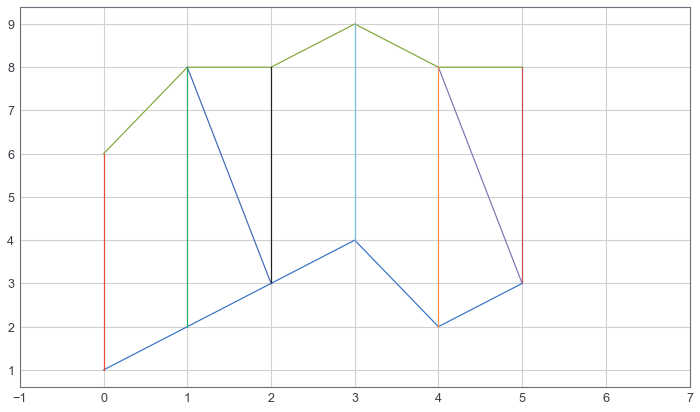

In [15]:
A = np.array([1,2,3,4,2,3])
# B = np.array([7,8,5,9,11,9])
B = np.array([1,3,3,4,3,3]) # 두 개의 data set 에 대해서 나오는 결과의 차이 확인

cost, path = DTW(A, B, window = 6)
print('Total Distance is ', cost)
offset = 5
plt.figure(figsize=(12,7))
plt.xlim([-1, max(len(A), len(B)) + 1])
plt.plot(A)
plt.plot(B + offset)
for (x1, x2) in path:
    plt.plot([x1, x2], [A[x1], B[x2] + offset])
plt.show()

# 출처: http://hamait.tistory.com/862 [HAMA 블로그]

### 참고할 링크들
https://pypi.python.org/pypi/dtw/1.1 <br>
http://hamait.tistory.com/862 <br>
http://www.speech.zone/exercises/dtw-in-python/ <br>
https://pypi.python.org/pypi/fastdtw <br>
http://luthuli.cs.uiuc.edu/~daf/courses/cs-498-daf-ps/lecture%2018%20-%20time%20series,%20dtw.pdf <br>
http://www.smallake.kr/?p=17918 <br>
https://github.com/pierre-rouanet/dtw/blob/master/examples/simple%20example.ipynb <br>
http://jonathankinlay.com/2016/08/dynamic-time-warping/


## PIP(Perceptually Important Point) Algorithm

차트 패턴 중 돌파, 지지, 저항 등과 관련된 로직 작성에 유리 <br>
PIP로 전처리 이후 Cosine Similar 라이브러리 사용 시 유용함 <br>

<img src = "https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/5bd5c7ed238cab43175cb932/53fbf11b36db464f69d80a723d5b9053/image.png">

**Segmentation Based On Turning Points**

*The “Perceptually Important Points” algorithm gives a method for dimensionality reduction and a mechanism to automatically extract the most important points from a human observer perspective, favouring compression and a good visualization of time series with high dimensionality.*

### Example

In [16]:
from fastpip import pip

In [17]:
pip([(0, 0), (1, 1), (2, 2), (3, 1), (4, 0), (5, 1), (6, 2), (7, 1), (8, 0)], 5)

[(0, 0), (2, 2), (4, 0), (6, 2), (8, 0)]

### 실제 Chart 데이터로 테스팅

In [18]:
a = [(0, 0), (1, 1), (2, 2), (3, 1), (4, 0), (5, 1), (6, 2), (7, 1), (8, 0)]
pip(a,5)

[(0, 0), (2, 2), (4, 0), (6, 2), (8, 0)]

In [19]:
type(a)

list

인덱스와 결과값이 튜플형태로 들어가 있는 리스트로 input 해야 결과가 나오네요 <br>
pd.Series 또는 OrderedDict 로 input 해보니 오류가 발생합니다......

또 인덱스 항목이 날짜일 경우 에러가 발생함을 확인하였습니다

In [20]:
company_code # YG엔터

'A122870'

In [23]:
test_series = test_data.loc[company_code]
test_series.index = range(len(test_series.index)) # 인덱스를 숫자로 초기화
test_series.tail()

55    0.467066
56    0.461078
57    0.383234
58    0.395210
59    0.443114
Name: A122870, dtype: float64

In [24]:
test_list = test_series.reset_index().values.tolist() # [[index1, value1], [index2, value2]...] 형태의 list 로 변환 하기

In [25]:
pip_test_list = pip(test_list, 7)
pip_test_list

[[0.0, 0.20359281437125748],
 [9.0, 0.005988023952095809],
 [15.0, 0.40119760479041916],
 [19.0, 0.2874251497005988],
 [30.0, 0.9640718562874252],
 [53.0, 0.3592814371257485],
 [59.0, 0.4431137724550898]]

이제 이걸 다시 series로 바꿔주어야 그래프를 그릴 수 있습니다

In [26]:
tmp_array=np.array(pip_test_list)
pip_test_series = pd.Series(tmp_array[:,1], index=tmp_array[:,0])

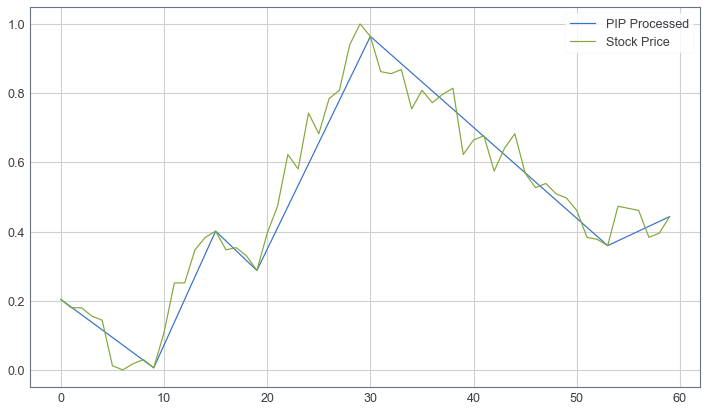

In [27]:
plt.figure(figsize=(12,7))
plt.plot(pip_test_series,label='PIP Processed')
plt.plot(test_series,label='Stock Price')
plt.legend()
plt.show()

### Preprocessing with PIP algorithms -> Cosine Similarity Analysis

함수화 하기

In [28]:
def get_pips(series, point_number):
    series.index = range(len(series.index))
    conversion_list = series.reset_index().values.tolist()
    pip_list = pip(conversion_list, point_number)
    tmp_array = np.array(pip_list)
    return pd.Series(tmp_array[:,1], index=tmp_array[:,0])

point_number : PIP 알고리즘으로 뽑아낼 point 의 수

In [29]:
pip_df = test_data.apply(get_pips, axis = 1, args = (7,)) # 여기서는 important points 를 7개 뽑는 걸로 실험

In [30]:
pip_df

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
A000020,0.910714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.107143
A000030,0.018018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801802,NaN,1.000000,0.972973
A000040,0.355102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.632653,NaN,NaN,NaN,NaN,NaN,0.804082
A000050,0.238095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.619048,NaN,NaN,0.642857
A000070,0.342105,NaN,NaN,NaN,NaN,NaN,NaN,0.052632,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.157895
A000100,0.196078,NaN,NaN,NaN,0.019608,NaN,NaN,NaN,NaN,NaN,...,NaN,0.274510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705882
A000150,0.009404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780564
A000180,0.509434,NaN,NaN,NaN,NaN,NaN,NaN,0.094340,NaN,NaN,...,NaN,0.924528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622642
A000210,0.155556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,0.740741
A000220,0.055690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.757869,NaN,NaN,NaN,NaN,NaN,NaN,0.721550


In [31]:
def get_cos_similar(company_code, test_data) :    
    target_data = test_data.loc[company_code] # target 이 되는 데이터
    compare_data = test_data.drop(company_code) # 비교 할 데이터 프레임에서 기준이되는 열 삭제
    cos_similar = pd.Series()
    for i in compare_data.index :
           cos_similar = cos_similar.append(pd.Series(1 - spatial.distance.cosine(target_data, compare_data.loc[i]), index = [i]))
    cos_similar = cos_similar.sort_values(ascending=False)
    return cos_similar

In [32]:
pip_cos_similar = get_cos_similar(company_code, pip_df) # NaN 값들을 어떻게 처리할지 고민 해보기

Nan 값들 때문에 에러 발생 <br>
NaN 값들을 채워넣기 위해 pd.Series.interpolate 메서드 사용해보기

In [33]:
s = pd.Series([0, 1, np.nan, 3, np.nan, np.nan, 9])
s

0    0.0
1    1.0
2    NaN
3    3.0
4    NaN
5    NaN
6    9.0
dtype: float64

In [34]:
s.interpolate() # defalut method가 linear interpolation 이기 때문에 바로 사용하면 됩니다

0    0.0
1    1.0
2    2.0
3    3.0
4    5.0
5    7.0
6    9.0
dtype: float64

linear 하게 NaN 값들이 채워지는 것 확인!

In [35]:
pip_df = pip_df.interpolate(axis=1)

In [36]:
pip_cos_similar = get_cos_similar(company_code, pip_df)

DataFrame 에 적용하여 NaN 제거 후 cosine similar 분석 실행

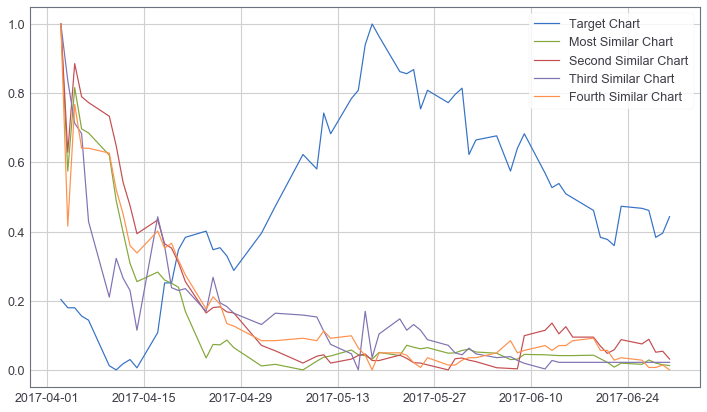

Most Similar Code is :  A001420_2
Second Similar Code is :  A093640
Third Similar Code is :  A218150
Fourth Similar Code is :  A025560


In [37]:
plt_cosine_result(pip_cos_similar)

A900040 : 차이나그레이트 <br>
A041510 : 에스엠 <br>
A068050 : 팬엔터테인먼트 <br>
A024720 : 한국콜마홀딩스 

PIP DataFrame 으로 그려보기

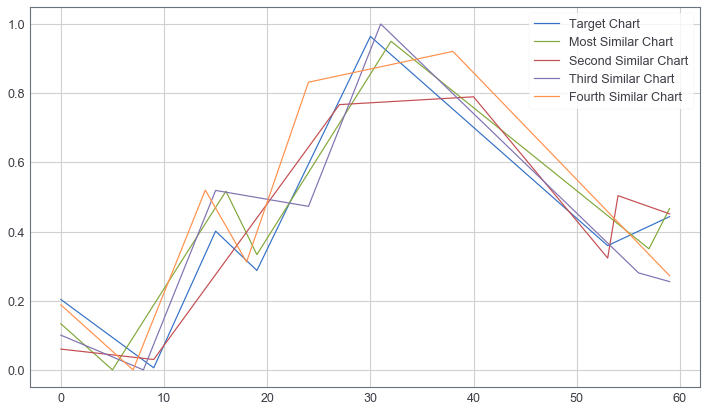

Most Similar Code is :  A900040
Second Similar Code is :  A041510
Third Similar Code is :  A068050
Fourth Similar Code is :  A024720_2


In [38]:
plt.figure(figsize=(12,7))
plt.plot(pip_df.loc[company_code], label = 'Target Chart')
plt.plot(pip_df.loc[pip_cos_similar.index[0]], label = 'Most Similar Chart')
plt.plot(pip_df.loc[pip_cos_similar.index[1]], label = 'Second Similar Chart')
plt.plot(pip_df.loc[pip_cos_similar.index[2]], label = 'Third Similar Chart')
plt.plot(pip_df.loc[pip_cos_similar.index[3]], label = 'Fourth Similar Chart')
plt.legend()
plt.show()
print('Most Similar Code is : ', pip_cos_similar.index[0])
print('Second Similar Code is : ', pip_cos_similar.index[1])
print('Third Similar Code is : ', pip_cos_similar.index[2])
print('Fourth Similar Code is : ', pip_cos_similar.index[3])

그냥 Cosine_Similarity 적용했을 때와의 비교

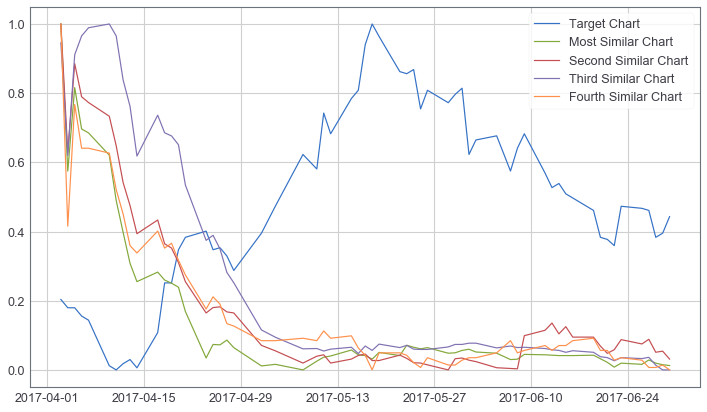

Most Similar Code is :  A001420_2
Second Similar Code is :  A093640
Third Similar Code is :  A004770
Fourth Similar Code is :  A025560


In [39]:
plt_cosine_result(cos_similar)

### 참고할 링크들
- Pattern recognition through perceptually important points in financial time series <br> https://www.witpress.com/Secure/elibrary/papers/CF04/CF04024FU.pdf <br>
- python-fastpip (Segmentation Based On Turning Points) <br>
https://github.com/intelie/python-fastpip <br>
- A prediction scheme using perceptually important points and dynamic time warping <br> 
http://www.sciencedirect.com/science/article/pii/S0957417414002516 <br>
- Index Financial Time Series Based on Zigzag-Perceptually Important Points <br>
http://thescipub.com/PDF/jcssp.2010.1389.1395.pdf <br>
- Perceptually important points and dynamic time warping in time series prediction : Application to finance
http://ikee.lib.auth.gr/record/134891/files/GRI-2014-12895.pdf <br>
- **공식 Documentation** <br>
https://pypi.python.org/pypi/python-fastpip/1.2

* FIVE MOST POPULAR SIMILARITY MEASURES IMPLEMENTATION IN PYTHON
http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
* A new user similarity model to improve the accuracy of collaborative filtering<br> http://www.sciencedirect.com/science/article/pii/S0950705113003560
* A new similarity measure for collaborative filtering to
alleviate the new user cold-starting problem <br> http://www.sfu.ca/~cqt/IAT352/research/used/extra/ISSUES_newUser_SD-A_new_similarity_measure_for_collaborative_filtering_to_alleviate_the_new_user_cold-starting_problem.pdf